In [52]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from time import time
from sklearn import metrics
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [53]:
data = load_wine()
X, y = data.data, data.target
columns=data.feature_names


df = pd.DataFrame(data=data.data, columns=data.feature_names)

scaler = StandardScaler()
pca = PCA()
pipeline = Pipeline([('scaler', scaler), ('pca', pca)])
search_space = [{'pca__n_components': [2, 4, 6]}]

grid_search = GridSearchCV(pipeline,
                           search_space,
                           n_jobs=-2,
                           )

grid_search.fit(X, y)
pca.fit(X)
#print(pca.components_)

pca.explained_variance_ratio_

#X_std = scaler.fit_transform(df[columns])
#components = pca.fit_transform(X_std)

#df.head()

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05, 8.46213034e-06, 2.80681456e-06, 1.52308053e-06,
       1.12783044e-06, 7.21415811e-07, 3.78060267e-07, 2.12013755e-07,
       8.25392788e-08])

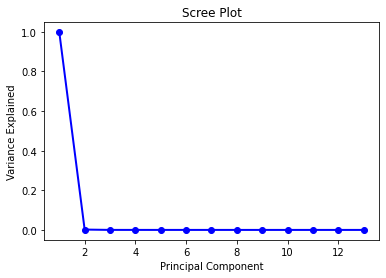

In [54]:
#pca.explained_variance_ratio_.cumsum()
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [55]:
pca = PCA(n_components=0.95)
pca.fit(X)
pca.n_components_

1